An overview of cufflinks, a library for easy interactive Pandas charting with Plotly.

Cufflinks binds [Plotly](https://plot.ly/python) directly to [pandas](http://pandas.pydata.org/) dataframes.

In [1]:
import plotly.tools as tls
tls.embed('https://plot.ly/~cufflinks/8')

## Packages
Run ! pip install cufflinks --upgrade to install Cufflinks. In addition to Plotly, pandas and Cufflinks, this tutorial will also use [NumPy](http://www.numpy.org/).

In [2]:
import plotly.plotly as py
import cufflinks as cf
import pandas as pd
import numpy as np
print (cf.__version__)

0.15


## Dataframes
With Plotly's Python library, you can describe figures with DataFrame's series and index's

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [4]:
df = cf.datagen.lines()
iplot([{'x': df.index, 'y': df[col], 'name': col}  for col in df.columns])
# df.iplot()

But with `cufflinks`, you can plot them directly

In [5]:
df.iplot(kind='scatter')

Almost every chart that you make in cufflinks will be created with just one line of code.

In [6]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
df.scatter_matrix(world_readable=True)

Charts created with cufflinks are synced with your online Plotly account. You'll need to [configure your credentials](https://plot.ly/python/getting-started/) to get started. cufflinks can also be configured to work offline in IPython notebooks with [Plotly Offline](https://plot.ly/python/offline). To get started with Plotly Offline, [download a trial library](http://purchasing.plot.ly/plotly-offline-ipython?_ga=2.131506889.750286048.1554375372-1567550720.1554375372) and run `cf.go_offline()`.

In [7]:
cf.go_online() # switch back to online mode, where graphs are saved on your online plotly account

In [8]:
cf.go_offline()

By default, plotly graphs are *public*. Make them private by setting `world_readable` to `False`

In [9]:
df.a.iplot(kind='histogram', world_readable=False)

Only you (the creator) will be able to see this chart, or change the global, default settings with `cf.set_config_file`

In [10]:
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

## Chart Types

### Line Charts

In [65]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['A', 'B']).cumsum()  # cummulative sum
df.iplot()

Plot one column vs another with x and y keywords

In [70]:
df.iplot(x='A', y='B', mode='markers', size=5, colors='purple')

### Bar Charts

Download some civic data. A time series log of the 311 complaints in NYC.

In [24]:
df = pd.read_csv('311_150k.csv',
    #'https://raw.githubusercontent.com/plotly/widgets/master/ipython-examples/311_150k.csv', 
    parse_dates=True, 
    index_col=1
)
df.head(3)

/home/hung/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning:

Columns (8,39,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.



,Unique Key,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Created Date,,,,,,,,,,,,,,,,,,,,,
2014-11-16 23:46:00,29300358,11/16/2014 11:46:00 PM,DSNY,BCC - Queens East,Derelict Vehicles,14 Derelict Vehicles,Street,11432,80-25 PARSONS BOULEVARD,PARSONS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.719411,-73.808882,"(40.719410639341916, -73.80888158860446)"
2014-11-16 02:24:35,29299837,11/16/2014 02:24:35 AM,DOB,Department of Buildings,Building/Use,Illegal Conversion Of Residential Building/Space,NaN,10465,938 HUNTINGTON AVENUE,HUNTINGTON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.827862,-73.830641,"(40.827862046105416, -73.83064067165407)"
2014-11-16 02:17:12,29297857,11/16/2014 02:50:48 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11201,229 DUFFIELD STREET,DUFFIELD STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.691248,-73.984375,"(40.69124772858873, -73.98437529459297)"


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149999 entries, 2014-11-16 23:46:00 to 2014-10-19 00:00:00
Data columns (total 51 columns):
Unique Key                        149999 non-null int64
Closed Date                       82469 non-null object
Agency                            149999 non-null object
Agency Name                       149999 non-null object
Complaint Type                    149999 non-null object
Descriptor                        149058 non-null object
Location Type                     112663 non-null object
Incident Zip                      136473 non-null object
Incident Address                  123384 non-null object
Street Name                       122206 non-null object
Cross Street 1                    117942 non-null object
Cross Street 2                    117353 non-null object
Intersection Street 1             19606 non-null object
Intersection Street 2             19588 non-null object
Address Type                      139979 non-null object
City

In [29]:
series = df['Complaint Type'].value_counts()[:20]
series

HEAT/HOT WATER              32202
Street Light Condition       7558
Blocked Driveway             6997
UNSANITARY CONDITION         6174
PAINT/PLASTER                5388
Illegal Parking              5381
Street Condition             4847
Noise                        4615
PLUMBING                     4284
Water System                 3323
Noise - Commercial           3206
DOOR/WINDOW                  3194
Traffic Signal Condition     2766
WATER LEAK                   2501
Dirty Conditions             2283
ELECTRIC                     2205
Sanitation Condition         2195
DOF Literature Request       2183
Broken Muni Meter            2159
FLOORING/STAIRS              2129
Name: Complaint Type, dtype: int64

Plot a series directly

In [30]:
series.iplot(kind='bar', yTitle='Number of Complaints', title='NYC 311 Complaints')

Plot a dataframe row as a bar

In [32]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['A', 'B', 'C', 'D'])
row = df.iloc[5]
row.iplot(kind='bar')

Call `iplot(kind='bar')` on a dataframe to produce a grouped bar chart

In [33]:
df.iplot(kind='bar')

In [34]:
df.iplot(kind='bar', barmode='stack')

Remember: plotly charts are interactive. Click on the legend entries to hide-and-show traces, click-and-drag to zoom, double-click to autoscale, shift-click to drag.

Make your bar charts horizontal with `kind='barh'`

In [35]:
df.iplot(kind='barh',barmode='stack', bargap=.1,)

### Themes

In [36]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [37]:
cf.set_config_file(theme='pearl')

### Histograms

In [39]:
df = pd.DataFrame({'a': np.random.randn(1000) + 1,
                   'b': np.random.randn(1000),
                   'c': np.random.randn(1000) - 1})

df.iplot(kind='histogram', )

Customize your histogram with

- `barmode (overlay | group | stack)`
- `bins (int)`
- `histnorm ('' | 'percent' | 'probability' | 'density' | 'probability density')`
- `histfunc ('count' | 'sum' | 'avg' | 'min' | 'max')`

In [49]:
df.iplot(
    kind='histogram', 
    barmode='overlay', 
    bins=108, 
    histnorm='probability density'
)

Like every chart type, split your traces into `subplots` or small-multiples with subplots and optionally `shape`. More on `subplots` below.

In [54]:
df.iplot(kind='histogram', subplots=True, shape=(1, 3))

### Box Plots

In [55]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.iplot(kind='box')

### Area Charts
To produce stacked area plot, each column must be either all positive or all negative values.

When input data contains `NaN`, it will be automatically filled by 0. If you want to drop or fill by different values, use `dataframe.dropna()` or `dataframe.fillna()` before calling plot.

In [56]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

In [57]:
df.iplot(kind='area', fill=True)

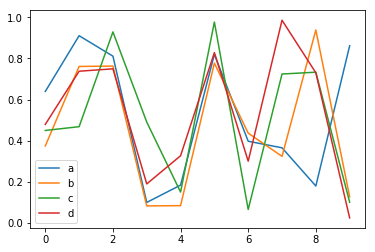

In [60]:
df.plot()
print()

For non-stacked area charts, set `kind=scatter` with `fill=True`

In [61]:
df.iplot(fill=True)

### Scatter Plot

Set `x` and `y` as column names. If `x` isn't supplied, `df.index` will be used.

In [72]:
df = pd.read_csv(
    'http://www.stat.ubc.ca/~jenny/notOcto/STAT545A/examples/gapminder/data/gapminderDataFiveYear.txt', 
    sep='\t'
)
df2007 = df[df.year==2007]
df1952 = df[df.year==1952]

df2007.iplot(kind='scatter', mode='markers', x='gdpPercap', y='lifeExp', size=5, colors='blue')

Plotting multiple column scatter plots isn't as easy with cufflinks. Here is an example with Plotly's native syntax

In [75]:
fig = {
    'data': [
        {'x': df2007.gdpPercap, 'y': df2007.lifeExp, 'text': df2007.country, 'mode': 'markers', 'name': '2007'},
        {'x': df1952.gdpPercap, 'y': df1952.lifeExp, 'text': df1952.country, 'mode': 'markers', 'name': '1952'}
    ],
    'layout': {
        'xaxis': {'title': 'GDP per Capita', 'type': 'log'},
        'yaxis': {'title': "Life Expectancy"}
    }
}
iplot(fig)

Grouping isn't as easy either. But, with Plotly's native syntax:

In [76]:
iplot(
    {
        'data': [
            {
                'x': df[df['year']==year]['gdpPercap'],
                'y': df[df['year']==year]['lifeExp'],
                'name': year, 'mode': 'markers',
            } for year in [1952, 1982, 2007]
        ],
        'layout': {
            'xaxis': {'title': 'GDP per Capita', 'type': 'log'},
            'yaxis': {'title': "Life Expectancy"}
        }
})

### Bubble Charts

Add `size` to create a bubble chart. Add hover `text` with the text attribute.

In [78]:
df2007.iplot(
    kind='bubble', 
    x='gdpPercap', 
    y='lifeExp', 
    size='pop', 
    text='country',
    xTitle='GDP per Capita', 
    yTitle='Life Expectancy'
)

### Subplots

`subplots=True` partitions columns into separate subplots. Specify rows and columns with `shape=(rows, cols)` and share axes with `shared_xaxes=True` and `shared_yaxes=True`.

In [80]:
df=cf.datagen.lines(3)
df.iplot(subplots=True, shape=(3,1), shared_xaxes=True, fill=True)

Add subplot titles with `subplot_titles` as a list of titles or `True` to use column names.

In [83]:
cf.datagen.lines(6).iplot(subplots=True, subplot_titles=True, legend=False)

### Scatter matrix

In [88]:
df.scatter_matrix(world_readable=True, bins=20, size=5, asFigure=False, color='magenta')

### Heatmaps

In [90]:
df = cf.datagen.heatmap(20,20)
df.iplot(kind='heatmap',colorscale='spectral')

### Lines and Shaded Areas

Use `hline` and `vline` for horizontal and vertical lines.

In [95]:
df=cf.datagen.lines(3,columns=['a','b','c'], n=200)

In [98]:
df.iplot(hline=[2,4],vline=['2015-02-10', '2015-06-10'])

Draw shaded regions with hspan

In [100]:
df.iplot(hspan=[(-1,1),(2,5)])

Extra parameters can be passed in the form of dictionaries, width, fill, color, fillcolor, opacity

In [102]:
df.iplot(vspan={'x0':'2015-02-15','x1':'2015-03-15','color':'rgba(30,30,30,0.3)','fill':True,'opacity':.4})

## Customizing Figures

cufflinks is designed for simple one-line charting with Pandas and Plotly. All of the Plotly chart attributes are not directly assignable in the df.iplot call signature.

To update attributes of a cufflinks chart that aren't available, first convert it to a figure (`asFigure=True`), then tweak it, then plot it with plotly.plotly.iplot.

Here is an example of a simple plotly figure. You can find more examples in [our online python documentation](https://plot.ly/python).

In [ ]:
from plotly.graph_objs import *
py.iplot({
    'data': [
        Bar(**{
            'x': [1, 2, 3],
            'y': [3, 1, 5],
            'name': 'first trace',
            'type': 'bar'
        }),
        Bar(**{
            'x': [1, 2, 3],
            'y': [4, 3, 6],
            'name': 'second trace',
            'type': 'bar'
        })
    ],
    'layout': Layout(**{
        'title': 'simple example'
    })
})

cufflinks generates these figure's that describe plotly graphs. For example, this graph: